In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
data = pd.read_csv("AirlinePassengers.csv")

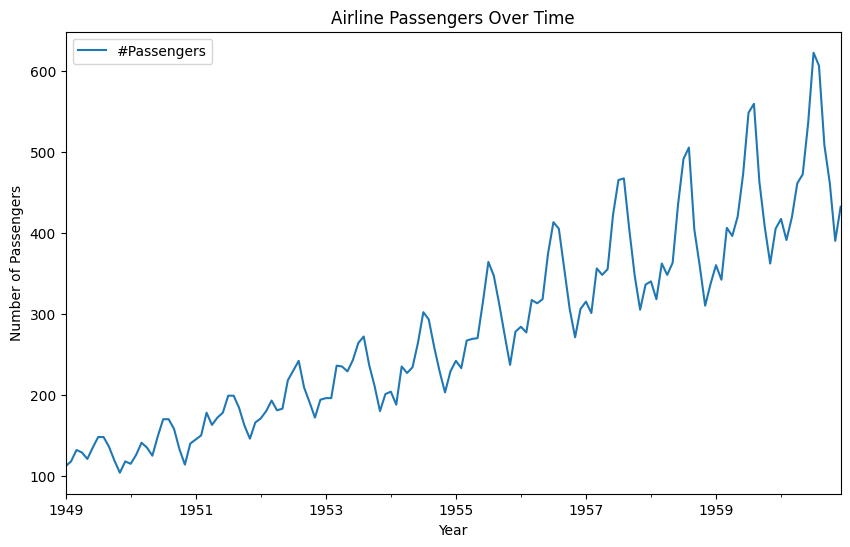

In [7]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.plot(figsize=(10, 6))
plt.title("Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

In [8]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

In [10]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

In [11]:
seq_length = 12
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0055 - val_loss: 0.0170
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0051 - val_loss: 0.0129
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0056 - val_loss: 0.0138
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0055 - val_loss: 0.0164
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0072 - val_loss: 0.0149
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0058 - val_loss: 0.0128
Epoch 7/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0049 - val_loss: 0.0133
Epoch 8/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0057 - val_loss: 0.0169
Epoch 9/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0056 - val_loss: 0.0146
Epoch 10/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0057 - val_loss: 0.0158
Epoch 11/100
3/3 [=

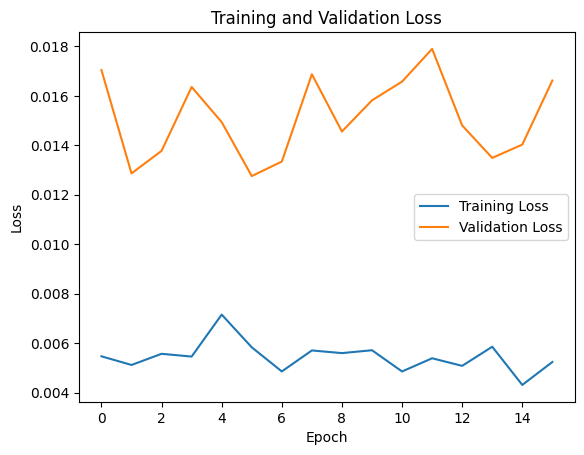

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

1/1 [==============================] - 4s 4s/step
Mean Absolute Error: 65.96267520680146
Root Mean Squared Error: 74.73842763985449


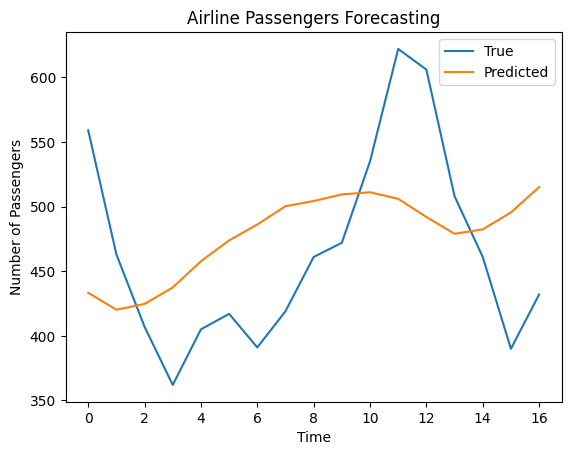

In [19]:
plt.plot(y_test_inverse, label='True')
plt.plot(y_pred_inverse, label='Predicted')
plt.title('Airline Passengers Forecasting')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
